In [1]:
#參考資料
#https://youtu.be/crQkHHhY7aY 12分鐘cluster
#https://www.interactivebrokers.com/campus/ibkr-quant-news/hierarchical-clustering-in-python-a-comprehensive-implementation-guide-part-ii/

#https://youtu.be/0U9cs2V-Mqc 13分鐘heatmap

#https://stackoverflow.com/questions/22408237/named-colors-in-matplotlib 顏色
#https://matplotlib.org/stable/users/explain/colors/colormaps.html 色條

#https://stackoverflow.com/questions/61816216/seaborn-clustermap-with-two-row-colors 兩條row_color


In [2]:
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [3]:
counts = pd.read_csv('heatmap&cluster.csv')
counts

,Gene Name,MDCK_1,MDCK_2,MDCK_3,CA_1,CA_2,CA_3,KD_1,KD_2,KD_3
0,ITGB1,488.845093,524.617432,584.176270,478.409943,470.602448,415.756927,550.177917,517.334412,530.499268
1,VCL,154.844284,148.085327,132.126373,164.283783,160.223648,155.004868,211.769165,218.899338,218.515762
2,TGFBI,31.073257,29.047001,27.694672,22.987837,20.253202,19.473551,193.368805,186.904968,182.181305
3,COL5A1,22.106228,19.572609,20.315268,25.830235,24.336178,22.258505,80.400826,95.391823,90.963860
4,CCN2,11.697845,12.133048,11.398445,6.072078,4.832736,5.394914,37.628437,40.204163,38.467026
5,ITGA5,5.083356,4.906776,4.472719,13.912910,12.591550,13.329207,41.807213,45.464657,42.669777


In [4]:
counts = counts.set_index('Gene Name')
counts

,MDCK_1,MDCK_2,MDCK_3,CA_1,CA_2,CA_3,KD_1,KD_2,KD_3
Gene Name,,,,,,,,,
ITGB1,488.845093,524.617432,584.176270,478.409943,470.602448,415.756927,550.177917,517.334412,530.499268
VCL,154.844284,148.085327,132.126373,164.283783,160.223648,155.004868,211.769165,218.899338,218.515762
TGFBI,31.073257,29.047001,27.694672,22.987837,20.253202,19.473551,193.368805,186.904968,182.181305
COL5A1,22.106228,19.572609,20.315268,25.830235,24.336178,22.258505,80.400826,95.391823,90.963860
CCN2,11.697845,12.133048,11.398445,6.072078,4.832736,5.394914,37.628437,40.204163,38.467026
ITGA5,5.083356,4.906776,4.472719,13.912910,12.591550,13.329207,41.807213,45.464657,42.669777


In [5]:
counts = counts.T
counts

Gene Name,ITGB1,VCL,TGFBI,COL5A1,CCN2,ITGA5
MDCK_1,488.845093,154.844284,31.073257,22.106228,11.697845,5.083356
MDCK_2,524.617432,148.085327,29.047001,19.572609,12.133048,4.906776
MDCK_3,584.176270,132.126373,27.694672,20.315268,11.398445,4.472719
CA_1,478.409943,164.283783,22.987837,25.830235,6.072078,13.912910
CA_2,470.602448,160.223648,20.253202,24.336178,4.832736,12.591550
CA_3,415.756927,155.004868,19.473551,22.258505,5.394914,13.329207
KD_1,550.177917,211.769165,193.368805,80.400826,37.628437,41.807213
KD_2,517.334412,218.899338,186.904968,95.391823,40.204163,45.464657
KD_3,530.499268,218.515762,182.181305,90.963860,38.467026,42.669777


In [6]:
minvalue_series = counts.min() 
minvalue_series

Gene Name
ITGB1     415.756927
VCL       132.126373
TGFBI      19.473551
COL5A1     19.572609
CCN2        4.832736
ITGA5       4.472719
dtype: float64

In [7]:
maxvalue_series = counts.max() 
maxvalue_series

Gene Name
ITGB1     584.176270
VCL       218.899338
TGFBI     193.368805
COL5A1     95.391823
CCN2       40.204163
ITGA5      45.464657
dtype: float64

In [8]:
counts

Gene Name,ITGB1,VCL,TGFBI,COL5A1,CCN2,ITGA5
MDCK_1,488.845093,154.844284,31.073257,22.106228,11.697845,5.083356
MDCK_2,524.617432,148.085327,29.047001,19.572609,12.133048,4.906776
MDCK_3,584.176270,132.126373,27.694672,20.315268,11.398445,4.472719
CA_1,478.409943,164.283783,22.987837,25.830235,6.072078,13.912910
CA_2,470.602448,160.223648,20.253202,24.336178,4.832736,12.591550
CA_3,415.756927,155.004868,19.473551,22.258505,5.394914,13.329207
KD_1,550.177917,211.769165,193.368805,80.400826,37.628437,41.807213
KD_2,517.334412,218.899338,186.904968,95.391823,40.204163,45.464657
KD_3,530.499268,218.515762,182.181305,90.963860,38.467026,42.669777


In [9]:
counts = counts.T
counts

,MDCK_1,MDCK_2,MDCK_3,CA_1,CA_2,CA_3,KD_1,KD_2,KD_3
Gene Name,,,,,,,,,
ITGB1,488.845093,524.617432,584.176270,478.409943,470.602448,415.756927,550.177917,517.334412,530.499268
VCL,154.844284,148.085327,132.126373,164.283783,160.223648,155.004868,211.769165,218.899338,218.515762
TGFBI,31.073257,29.047001,27.694672,22.987837,20.253202,19.473551,193.368805,186.904968,182.181305
COL5A1,22.106228,19.572609,20.315268,25.830235,24.336178,22.258505,80.400826,95.391823,90.963860
CCN2,11.697845,12.133048,11.398445,6.072078,4.832736,5.394914,37.628437,40.204163,38.467026
ITGA5,5.083356,4.906776,4.472719,13.912910,12.591550,13.329207,41.807213,45.464657,42.669777


In [10]:
for col in counts:
    counts[col] = (counts[col] - minvalue_series)
counts

,MDCK_1,MDCK_2,MDCK_3,CA_1,CA_2,CA_3,KD_1,KD_2,KD_3
Gene Name,,,,,,,,,
ITGB1,73.088166,108.860505,168.419343,62.653016,54.845521,0.000000,134.420990,101.577485,114.742341
VCL,22.717911,15.958954,0.000000,32.157410,28.097275,22.878495,79.642792,86.772965,86.389389
TGFBI,11.599706,9.573450,8.221121,3.514286,0.779651,0.000000,173.895254,167.431417,162.707754
COL5A1,2.533619,0.000000,0.742659,6.257626,4.763569,2.685896,60.828217,75.819214,71.391251
CCN2,6.865109,7.300312,6.565709,1.239342,0.000000,0.562178,32.795701,35.371427,33.634290
ITGA5,0.610637,0.434057,0.000000,9.440191,8.118831,8.856488,37.334494,40.991938,38.197058


In [11]:
counts = counts.rename(columns={'MDCK_1':'MDCK','MDCK_2':'MDCK','MDCK_3':'MDCK',
                                'CA_1':'CA','CA_2':'CA','CA_3':'CA',
                                'KD_1':'KD','KD_2':'KD','KD_3':'KD',
                               })
counts

,MDCK,MDCK,MDCK,CA,CA,CA,KD,KD,KD
Gene Name,,,,,,,,,
ITGB1,73.088166,108.860505,168.419343,62.653016,54.845521,0.000000,134.420990,101.577485,114.742341
VCL,22.717911,15.958954,0.000000,32.157410,28.097275,22.878495,79.642792,86.772965,86.389389
TGFBI,11.599706,9.573450,8.221121,3.514286,0.779651,0.000000,173.895254,167.431417,162.707754
COL5A1,2.533619,0.000000,0.742659,6.257626,4.763569,2.685896,60.828217,75.819214,71.391251
CCN2,6.865109,7.300312,6.565709,1.239342,0.000000,0.562178,32.795701,35.371427,33.634290
ITGA5,0.610637,0.434057,0.000000,9.440191,8.118831,8.856488,37.334494,40.991938,38.197058


In [12]:
#以下開始作圖

In [13]:
counts = counts.T
counts

Gene Name,ITGB1,VCL,TGFBI,COL5A1,CCN2,ITGA5
MDCK,73.088166,22.717911,11.599706,2.533619,6.865109,0.610637
MDCK,108.860505,15.958954,9.573450,0.000000,7.300312,0.434057
MDCK,168.419343,0.000000,8.221121,0.742659,6.565709,0.000000
CA,62.653016,32.157410,3.514286,6.257626,1.239342,9.440191
CA,54.845521,28.097275,0.779651,4.763569,0.000000,8.118831
CA,0.000000,22.878495,0.000000,2.685896,0.562178,8.856488
KD,134.420990,79.642792,173.895254,60.828217,32.795701,37.334494
KD,101.577485,86.772965,167.431417,75.819214,35.371427,40.991938
KD,114.742341,86.389389,162.707754,71.391251,33.634290,38.197058


In [14]:
counts = counts.reset_index(drop=False)
counts

Gene Name,index,ITGB1,VCL,TGFBI,COL5A1,CCN2,ITGA5
0,MDCK,73.088166,22.717911,11.599706,2.533619,6.865109,0.610637
1,MDCK,108.860505,15.958954,9.573450,0.000000,7.300312,0.434057
2,MDCK,168.419343,0.000000,8.221121,0.742659,6.565709,0.000000
3,CA,62.653016,32.157410,3.514286,6.257626,1.239342,9.440191
4,CA,54.845521,28.097275,0.779651,4.763569,0.000000,8.118831
5,CA,0.000000,22.878495,0.000000,2.685896,0.562178,8.856488
6,KD,134.420990,79.642792,173.895254,60.828217,32.795701,37.334494
7,KD,101.577485,86.772965,167.431417,75.819214,35.371427,40.991938
8,KD,114.742341,86.389389,162.707754,71.391251,33.634290,38.197058


In [15]:
counts = counts.rename(columns={'index':'Gene_Name'})
counts

Gene Name,Gene_Name,ITGB1,VCL,TGFBI,COL5A1,CCN2,ITGA5
0,MDCK,73.088166,22.717911,11.599706,2.533619,6.865109,0.610637
1,MDCK,108.860505,15.958954,9.573450,0.000000,7.300312,0.434057
2,MDCK,168.419343,0.000000,8.221121,0.742659,6.565709,0.000000
3,CA,62.653016,32.157410,3.514286,6.257626,1.239342,9.440191
4,CA,54.845521,28.097275,0.779651,4.763569,0.000000,8.118831
5,CA,0.000000,22.878495,0.000000,2.685896,0.562178,8.856488
6,KD,134.420990,79.642792,173.895254,60.828217,32.795701,37.334494
7,KD,101.577485,86.772965,167.431417,75.819214,35.371427,40.991938
8,KD,114.742341,86.389389,162.707754,71.391251,33.634290,38.197058


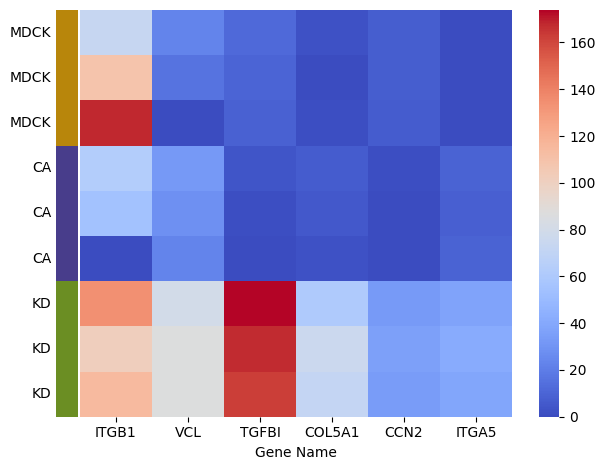

In [16]:
lut = {'MDCK': 'darkgoldenrod', 'CA': 'darkslateblue', 'KD': 'olivedrab'}
row_colors = counts['Gene_Name'].map(lut)

ax = sns.heatmap(counts.drop(['Gene_Name'], axis=1), cmap = 'coolwarm')
#cmap = 'RdYlBu'/'coolwarm'/'bwr'/'seismic'
ax.tick_params(axis='y', which='major', pad=20.5, length=0) #y軸文字
ax.set_yticklabels(counts['Gene_Name'], rotation=0) # optionally use the groups as the tick labels
for i, color in enumerate(row_colors):
    ax.add_patch(plt.Rectangle(xy=(-0.055, i), width=0.05, height=1, color=color, lw=0,
                               transform=ax.get_yaxis_transform(), clip_on=False))
plt.tight_layout()

plt.savefig("teacher.pdf", format="pdf", facecolor='white', bbox_inches="tight")

In [ ]:
#畫cluster

In [17]:
counts

Gene Name,Gene_Name,ITGB1,VCL,TGFBI,COL5A1,CCN2,ITGA5
0,MDCK,73.088166,22.717911,11.599706,2.533619,6.865109,0.610637
1,MDCK,108.860505,15.958954,9.573450,0.000000,7.300312,0.434057
2,MDCK,168.419343,0.000000,8.221121,0.742659,6.565709,0.000000
3,CA,62.653016,32.157410,3.514286,6.257626,1.239342,9.440191
4,CA,54.845521,28.097275,0.779651,4.763569,0.000000,8.118831
5,CA,0.000000,22.878495,0.000000,2.685896,0.562178,8.856488
6,KD,134.420990,79.642792,173.895254,60.828217,32.795701,37.334494
7,KD,101.577485,86.772965,167.431417,75.819214,35.371427,40.991938
8,KD,114.742341,86.389389,162.707754,71.391251,33.634290,38.197058
